In [3]:
import numpy as np

n=4   # n: Determina las dimensiones de la matriz A, y vectores b,  x0 y x_sol.

A = np.zeros((n,n))
for i in range(n-1):
    A[i][i]=2
    A[i][i+1]=-1
    A[i][i-1]=-1
A[n-1][n-1]=2
A[n-1][n-2]=-1
A[n-1][0]=1
A[0][n-1]=1
print (A)  #A: Matriz de nxn

b = np.zeros(n)
b[n-1]=1
print(b)  #b: Vector de dimensión n

x0= np.zeros(n)
print(x0)  #x0: Suposición inicial: Una suposición de solución inicial sobre la cual empieza a iterar el programa.

x_sol =np.zeros(n) 

for i in range (n):
    x_sol[i] = -n/4 + (i+1)/2
print(x_sol)  #x_sol: Solución exacta x*


[[ 2. -1.  0.  1.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2. -1.]
 [ 1.  0. -1.  2.]]
[0. 0. 0. 1.]
[0. 0. 0. 0.]
[-0.5  0.   0.5  1. ]


In [175]:
from math import *
from pprint import pprint
import numpy as np


def distinf(x, y):
    return max([abs(x[i]-y[i]) for i in range(len(x))])

def Jacobi(A, b, x0, TOL, MAX):
    n = len(A)
    x = [0.0 for x in range(n)]
    k = 1 # Contador de iteraciones
    while k <= MAX:
        for i in range(n):
            if abs(A[i][i]) <= 1e-15:
                print(" Imposible iterar ")
                return 
            s = sum([A[i][j]*x0[j] for j in range(n) if j != i])
            x[i] = (b[i]-float(s))/float(A[i][i])
            Pre_norma = x - x_sol  # Argumento de norma infinito
            norma_inf= np.linalg.norm(Pre_norma, np.inf) # Función Norma infinito
        print  (" %03d "% k , "    %.80s " % x, " %17f "% norma_inf)
        #print( ", " ," %08f " % norma_inf )
        if distinf(x, x0) < TOL:
            print (r" Solucion encontrada ")
            return 
        k += 1
        for i in range(n):
            x0[i] = x[i]
    print(" Iteraciones agotadas ")
    return 

Jacobi(A, b, x0,10e-5, 50)

 001      [0.0, 0.0, 0.0, 0.5]            0.500000 
 002      [-0.25, 0.0, 0.25, 0.5]            0.500000 
 003      [-0.25, 0.0, 0.25, 0.75]            0.250000 
 004      [-0.375, 0.0, 0.375, 0.75]            0.250000 
 005      [-0.375, 0.0, 0.375, 0.875]            0.125000 
 006      [-0.4375, 0.0, 0.4375, 0.875]            0.125000 
 007      [-0.4375, 0.0, 0.4375, 0.9375]            0.062500 
 008      [-0.46875, 0.0, 0.46875, 0.9375]            0.062500 
 009      [-0.46875, 0.0, 0.46875, 0.96875]            0.031250 
 010      [-0.484375, 0.0, 0.484375, 0.96875]            0.031250 
 011      [-0.484375, 0.0, 0.484375, 0.984375]            0.015625 
 012      [-0.4921875, 0.0, 0.4921875, 0.984375]            0.015625 
 013      [-0.4921875, 0.0, 0.4921875, 0.9921875]            0.007812 
 014      [-0.49609375, 0.0, 0.49609375, 0.9921875]            0.007812 
 015      [-0.49609375, 0.0, 0.49609375, 0.99609375]            0.003906 
 016      [-0.498046875, 0.0, 0.498046875, 0.

In [268]:
from math import*
from pprint import  pprint


def  distinf(x, y):
    return  max([abs(x[i]-y[i])for i in  range(len(x))])


def  GaussSeidel(A, b, x0, TOL, MAX):
    n = len(A)
    x = [0.0 for x in  range(n)]
    k = 1
    while  k  <=  MAX:
        for i in  range(n):
            if abs(A[i][i]) <= 1e-15:
                print  ("Imposible iterar") 
                return
            s1 = sum([A[i][j]*x[j] for j in  range(i)])
            s2 = sum([A[i][j]*x0[j] for j in  range(i+1, n)])
            x[i] = (b[i]-float(s1)-float(s2))/float(A[i][i])
            Pre_norma = x - x_sol  # Argumento de norma infinito
            norma_inf= np.linalg.norm(Pre_norma, np.inf) # Función Norma infinito
        print  (" %03d "% k , "    %.85s " % x, " %17f "% norma_inf)
        #print( ", " ," %08f " % norma_inf )
        if  distinf(x, x0) < TOL:
            print  (r"Solución  encontrada") 
            return
        k += 1
        for i in  range(n):
            x0[i] = x[i]
    print  ("Iteraciones agotadas") 
    return
GaussSeidel(A, b, x0, 10e-5, 50)

 001      [0.0, 0.0, 0.0, 0.5]            0.500000 
 002      [-0.25, -0.125, 0.1875, 0.71875]            0.312500 
 003      [-0.421875, -0.1171875, 0.30078125, 0.861328125]            0.199219 
 004      [-0.4892578125, -0.09423828125, 0.383544921875, 0.9364013671875]            0.116455 
 005      [-0.51531982421875, -0.065887451171875, 0.4352569580078125, 0.9752883911132812]            0.065887 
 006      [-0.5205879211425781, -0.04266548156738281, 0.4663114547729492, 0.9934496879577637]            0.042665 
 007      [-0.5180575847625732, -0.02587306499481201, 0.48378831148147583, 1.0009229481220245]            0.025873 
 008      [-0.5133980065584183, -0.014804847538471222, 0.49305905029177666, 1.0032285284250975]            0.014805 
 009      [-0.5090166879817843, -0.007978818845003843, 0.4976248547900468, 1.0033207713859156]            0.009017 
 010      [-0.5056497951154597, -0.00401247016270645, 0.49965415061160456, 1.0026519728635321]            0.005650 
 011      [-0.503

In [292]:
import numpy as np

def sor_metodo(A, b, omega, x0, convergence_criteria):
            
    phi = x0[:]
    residuo = np.linalg.norm(np.matmul(A, phi) - b) #Residuo inicial
    while residuo > convergence_criteria:
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[1]):
                if j != i:
                    sigma += A[i][j] * phi[j]
            phi[i] = (1 - omega) * phi[i] + (omega / A[i][i]) * (b[i] - sigma)
            Pre_norma = phi - x_sol  # Argumento de norma infinito
            norma_inf= np.linalg.norm(Pre_norma, np.inf) # Función Norma infinito
            #print (phi)
            print( ", " ," %08f " % norma_inf )
        residuo = np.linalg.norm(np.matmul(A, phi) - b)
    print(r"Solución  encontrada")    
    return


TOL = 1e-5 # Criterio de Convergencia : Máxima discrepacia para hallar solución satisfactoria
omega = 1.5 #Factor de Relajación




x0=[0,0,0,0]

sor_metodo(A, b, omega, x0, TOL)


,   1.000000 
,   1.000000 
,   1.000000 
,   0.500000 
,   0.500000 
,   0.500000 
,   0.421875 
,   0.421875 
,   0.421875 
,   0.271240 
,   0.271240 
,   0.271240 
,   0.194592 
,   0.194592 
,   0.194592 
,   0.147515 
,   0.130053 
,   0.130053 
,   0.110880 
,   0.088157 
,   0.088157 
,   0.084251 
,   0.062588 
,   0.062588 
,   0.062588 
,   0.046179 
,   0.046179 
,   0.046179 
,   0.033624 
,   0.033624 
,   0.033624 
,   0.024235 
,   0.024235 
,   0.024235 
,   0.018191 
,   0.017264 
,   0.017264 
,   0.014474 
,   0.012157 
,   0.012157 
,   0.011341 
,   0.008767 
,   0.008767 
,   0.008767 
,   0.006696 
,   0.006696 
,   0.006696 
,   0.005059 
,   0.005059 
,   0.005059 
,   0.003783 
,   0.003783 
,   0.003783 
,   0.002802 
,   0.002802 
,   0.002802 
,   0.002056 
,   0.002056 
,   0.002056 
,   0.001495 
,   0.001495 
,   0.001495 
,   0.001077 
,   0.001077 
,   0.001077 
,   0.000768 
,   0.000768 
,   0.000768 
,   0.000543 
,   0.000543 
,   0.000543 
,   0.

In [283]:
import numpy as np
def gaussPivot(a,b,tol=10e-5):
    n = len(b)
    
    # Se establecen la escala de factores
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
        
    for k in range(0,n-1):
        
        # Intercambio de Filas, de ser necesario
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: print("Matrix is singular")
        if p != k:
            cambioFila(b,k,p)
            cambioFila(s,k,p)
            cambioFila(a,k,p)
            
        # Eliminacion
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    if abs(a[n-1,n-1]) < tol: print("Matrix is singular")
        
    # Suctitución hacia atrás
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]       
    return b
    
def cambioFila(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]
b = [0,0,0,1]        
gaussPivot(A,b,10e-5)



[-0.5000000000000001, 0.0, 0.5000000000000001, 1.0000000000000002]

In [288]:
#Normas Infinitas para n=4
xgauss=[-0.5000000000000001, 0.0, 0.5000000000000001, 1.0000000000000002] # Solución dada por ELiminación Gaussiana con pivoteo
normgauss= x_sol - xgauss
np.linalg.norm(normgauss, np.inf)


xJacobi= [-0.49993896484375, 0.0, 0.49993896484375, 0.9998779296875] # Solución dada por el Método de Jacobi
normJacobi= x_sol - xJacobi
np.linalg.norm(normJacobi, np.inf)

xGaussSeidel= [-0.5000113164437251, 7.481702074163543e-05, 0.5000951939000696, 1.0000532551718972] # Solución dada por el Método de GaussSeidel 
normGaussSeidel= x_sol - xGaussSeidel
np.linalg.norm(normGaussSeidel, np.inf)

xSOR= [-0.5000065408056711, -1.1494578074345721e-05, 0.4999905417927612, 0.9999977627525602] # Solución dada por el Método de SOR
normSOR= x_sol - xSOR
np.linalg.norm(normSOR, np.inf)

1.1494578074345721e-05

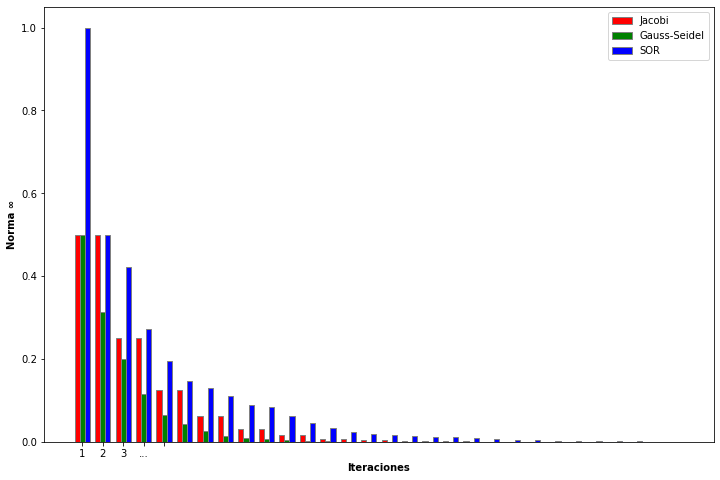

In [321]:

import numpy as np 
import matplotlib.pyplot as plt 
   
# Establecer ancho de la barra 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
   
# Establecer altura de la barra
Jacobi = [0.5, 0.5, 0.25, 0.25, 0.125, 0.125, 0.0625, 0.0625, 0.03125,
          0.03125, 0.015625, 0.015625, 0.007812, 0.007812, 0.003906,
          0.003906, 0.001953, 0.001953, 0.000977, 0.000977, 0.000488, 
          0.000488, 0.000244, 0.000244, 0.000122, 0.000122, 0, 0, 0, 0] 

GaussSeidel = [0.5, 0.3125, 0.199219, 0.116455, 0.065887, 0.042665,
               0.025873, 0.014805, 0.009017, 0.00565, 0.003332, 0.001854,
               0.000969, 0.000468, 0.000256, 0.000161, 9.5e-05, 0, 0, 
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

SOR = [1.0, 0.5, 0.421875, 0.27124, 0.194592, 0.147515, 0.130053, 
       0.11088, 0.088157, 0.084251, 0.062588, 0.046179, 0.033624, 
       0.024235, 0.018191, 0.017264, 0.014474, 0.012157, 0.011341, 
       0.008767, 0.006696, 0.005059, 0.003783, 0.002802, 0.002056, 
       0.001495, 0.001077, 0.000768, 0.000543, 0.000379]
   
# Establecer posiciones de la barra en el eje x 
br1 = np.arange(len(Jacobi)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# Relización de la gráfica 
plt.bar(br1, Jacobi, color ='r', width = barWidth, 
        edgecolor ='grey', label ='Gauss') 
plt.bar(br2, GaussSeidel, color ='g', width = barWidth, 
        edgecolor ='grey', label ='GaussSeidel') 
plt.bar(br3, SOR, color ='b', width = barWidth, 
        edgecolor ='grey', label ='SOR') 
   
# Leyendas , Nombres
plt.xlabel('Iteraciones', fontweight ='bold') 
plt.ylabel('Norma ∞', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(IT))], 
           ['1', '2', '3', '...']) 

plt.legend(labels=['Jacobi', 'Gauss-Seidel', 'SOR'])  

plt.show() 


In [320]:
#Pre procesamiento de la data para Visualización.

Sor_Norma =[    1.000000 
,   1.000000 
,   1.000000 
,   0.500000 
,   0.500000 
,   0.500000 
,   0.421875 
,   0.421875 
,   0.421875 
,   0.271240 
,   0.271240 
,   0.271240 
,   0.194592 
,   0.194592 
,   0.194592 
,   0.147515 
,   0.130053 
,   0.130053 
,   0.110880 
,   0.088157 
,   0.088157 
,   0.084251 
,   0.062588 
,   0.062588 
,   0.062588 
,   0.046179 
,   0.046179 
,   0.046179 
,   0.033624 
,   0.033624 
,   0.033624 
,   0.024235 
,   0.024235 
,   0.024235 
,   0.018191 
,   0.017264 
,   0.017264 
,   0.014474 
,   0.012157 
,   0.012157 
,   0.011341 
,   0.008767 
,   0.008767 
,   0.008767 
,   0.006696 
,   0.006696 
,   0.006696 
,   0.005059 
,   0.005059 
,   0.005059 
,   0.003783 
,   0.003783 
,   0.003783 
,   0.002802 
,   0.002802 
,   0.002802 
,   0.002056 
,   0.002056 
,   0.002056 
,   0.001495 
,   0.001495 
,   0.001495 
,   0.001077 
,   0.001077 
,   0.001077 
,   0.000768 
,   0.000768 
,   0.000768 
,   0.000543 
,   0.000543 
,   0.000543 
,   0.000379 
,   0.000379 
,   0.000379 
,   0.000270 
,   0.000262 
,   0.000262 
,   0.000210 
,   0.000179 
,   0.000179 
,   0.000160 
,   0.000121 
,   0.000121 
,   0.000121 
,   0.000091 
,   0.000091 
,   0.000091 
,   0.000067 
,   0.000067 
,   0.000067 
,   0.000049 
,   0.000049 
,   0.000049 
,   0.000035 
,   0.000035 
,   0.000035 
,   0.000025 
,   0.000025 
,   0.000025 
,   0.000019 
,   0.000018 
,   0.000018 
,   0.000015 
,   0.000012 
,   0.000012 
,   0.000012 
,   0.000009 
,   0.000009 
,   0.000009 
,   0.000007 
,   0.000007 
,   0.000007 ]

Sor_Norma1 = list(dict.fromkeys(Sor_Norma))  #ELimina elementos repetidos provenientes del mismo vector
#print(Sor_Norma1[0:30])  # 30 Primeras iteraciones para mejor visualización
#print(Sor_Norma1)
len(Sor_Norma1)

Jacobi = [    0.500000 
,   0.500000 
,   0.250000 
,   0.250000 
,   0.125000 
,   0.125000 
,   0.062500 
,   0.062500 
,   0.031250 
,   0.031250 
,   0.015625 
,   0.015625 
,   0.007812 
,   0.007812 
,   0.003906 
,   0.003906 
,   0.001953 
,   0.001953 
,   0.000977 
,   0.000977 
,   0.000488 
,   0.000488 
,   0.000244 
,   0.000244 
,   0.000122 
,   0.000122 ] 
len(Jacobi)
for i in range(21):
    Jacobi.append(0)
#print(Jacobi[0:30]) # 30 Primeras iteraciones para mejor visualización
#print(Jacobi)

GaussSeidel = [       0.500000 
,   0.312500 
,   0.199219 
,   0.116455 
,   0.065887 
,   0.042665 
,   0.025873 
,   0.014805 
,   0.009017 
,   0.005650 
,   0.003332 
,   0.001854 
,   0.000969 
,   0.000468 
,   0.000256 
,   0.000161 
,   0.000095 
      ]  
len(GaussSeidel)
for i in range(30):
    GaussSeidel.append(0)
#print(GaussSeidel)
print(GaussSeidel[0:30]) # 30 Primeras iteraciones para mejor visualización


[1.0, 0.5, 0.421875, 0.27124, 0.194592, 0.147515, 0.130053, 0.11088, 0.088157, 0.084251, 0.062588, 0.046179, 0.033624, 0.024235, 0.018191, 0.017264, 0.014474, 0.012157, 0.011341, 0.008767, 0.006696, 0.005059, 0.003783, 0.002802, 0.002056, 0.001495, 0.001077, 0.000768, 0.000543, 0.000379]
